CESAR DANIEL RINCÓN BRITO
UNIVERSIDAD JAVERIANA CALI
PREDICCIÓN DE VENTAS POR IDENTIFICACIÓN DISPERSA DE UN SISTEMA ERP A PARTIR DE DATOS DE UN MÓDULO POS

OBJETIVO: Adaptar un método de identificación de la dinámica de sistemas no lineales dispersos para predecir el comportamiento de las ventas del módulo POS de un sistema ERP.

In [29]:
# Import pandas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [30]:

# Leer el archivo CSV
df = pd.read_csv('../ERP-POS-Data/Sales-CSV970-1093.csv', delimiter=';')
display(df)

,FechaDocumento,Pico_0_B_M_A_TOP,Pico_B_M_A,EsFechaNomina,EsMayor2M,EsFinSemana,TotalVentaNeta,VentaContado,VentaCredito,UnidadesKit,TotalDsctos,Gramos,VentasNORTE,VentasOCCIDENTE,VentasCENTROORIENTE,Dolar,IPC,EsPicoAumetado,ESPicoBinary,EsFechaEspecial
0,44563,0.00,0.33,1,0,1,490600,490600,0,7,0,70,60300,0,430300,0.406600,0.166871,0,0,NaN
1,44564,0.25,0.33,1,0,0,813900,813900,0,10,0,100,48200,0,765700,0.000000,0.166742,0,0,NaN
2,44565,0.50,0.33,1,0,0,1088500,1088500,0,17,0,170,226800,0,861700,0.407680,0.166613,0,0,NaN
3,44566,0.50,0.33,1,0,0,1048600,1048600,0,10,0,100,37000,0,1011600,0.402210,0.166484,0,0,NaN
4,44567,0.75,0.66,0,1,0,2562770,2562770,0,65,0,650,136900,1804970,620900,0.403051,0.166355,3000000,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,45287,0.75,0.66,0,1,0,2168000,2168000,0,50,0,500,228000,1108400,831600,0.395283,0.081387,0,0,NaN
1088,45288,0.50,0.33,0,0,0,1993000,1993000,0,50,0,500,457100,619100,916800,0.385220,0.082903,0,0,NaN
1089,45289,0.75,0.66,0,1,0,3457700,3457700,0,86,0,860,319100,1300400,1838200,0.382850,0.084419,3000000,1,NaN
1090,45290,1.00,0.66,0,1,1,4504400,4504400,0,104,0,1040,1899500,993200,1611700,0.387300,0.085935,3000000,1,NaN


In [31]:
#Varibles globales
#PORCENTAJE DE ENTRENAMIENTO
V_TRAIN = 0.9 #Training percent
V_TEST_VALIDATION = True #Full valida percent 100% - V_TRAIN
#if V_TEST_VALIDATION = false
 #VALIDATION will be 50% of 100% - V_TRAIN
 #TEST will be 50% of 100% - V_TRAIN
V_HEAD_DATA = 1091 #Limit of data

V_TEST_SIZE = 1-V_TRAIN

#90% valtest 10% r=57%
#85% valtest 15% r=52%
#88% valtest 20% r=51%

#80% val10% r=46%, test 10% r=60%

In [32]:
y_trainDatos =  df['TotalVentaNeta'].head(V_HEAD_DATA) #Variable dependiente a predecir
#Variables entrada--------------------------------------------
r_trainDatos =  df['Pico_B_M_A'].head(V_HEAD_DATA) #0.81
x_trainDatos =  df['UnidadesKit'].head(V_HEAD_DATA)
n_trainDatos =  df['VentasCENTROORIENTE'].head(V_HEAD_DATA) #
k_trainDatos =  df['VentasOCCIDENTE'].head(V_HEAD_DATA) #
l_trainDatos =  df['VentasNORTE'].head(V_HEAD_DATA) #
u_trainDatos =  df['ESPicoBinary'].head(V_HEAD_DATA) 
#-------------------------------------------------------------
z_trainDatos =  df['Gramos'].head(V_HEAD_DATA)
w_trainDatos =  df['ESPicoBinary'].head(V_HEAD_DATA) #-40
v_trainDatos =  df['EsMayor2M'].head(V_HEAD_DATA) #0.70
s_trainDatos =  df['Pico_0_B_M_A_TOP'].head(V_HEAD_DATA) #-17
m_trainDatos =  df['Pico_0_B_M_A_TOP'].head(V_HEAD_DATA) #-17

In [33]:
# Escalar
#StandardScaler escala cada columna para que tenga media 0 y desviación estándar 1.
# MinMaxScaler mantiene datos postivos
scaler_y = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
y_trainDatos_scaled = scaler_y.fit_transform(y_trainDatos.values.reshape(-1, 1))

scaler_r = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
r_trainDatos_scaled = scaler_r.fit_transform(r_trainDatos.values.reshape(-1, 1))

scaler_x = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
x_trainDatos_scaled = scaler_x.fit_transform(x_trainDatos.values.reshape(-1, 1))

scaler_n = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
n_trainDatos_scaled = scaler_n.fit_transform(n_trainDatos.values.reshape(-1, 1))

scaler_k = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
k_trainDatos_scaled = scaler_k.fit_transform(k_trainDatos.values.reshape(-1, 1))

scaler_l = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
l_trainDatos_scaled = scaler_l.fit_transform(l_trainDatos.values.reshape(-1, 1))

scaler_u = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
u_trainDatos_scaled = scaler_u.fit_transform(u_trainDatos.values.reshape(-1, 1))
##---------------------------------------------------------------------------------

In [34]:
#Validacion y Test en %
#tiempos-------------------------------------------------------------------------------------------------
N = len(x_trainDatos)
# Paso 1: obtener 80% y 20% si es el caso
t_train_data, temp_data = train_test_split(list(range(N)), test_size=V_TEST_SIZE, shuffle=False)

# Paso 2: Dividir el conjunto temporal ejemplo: (20%) en 10% para validación y 10% para prueba
if V_TEST_VALIDATION:
    t_val_data = temp_data
    t_test_data = [] #or the same -> temp_data
else:
    t_val_data, t_test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

In [35]:
##

In [36]:
#Datos Salida y_trainDatos - Venta
#Datos entrada y_trainDatos_scaled
# Dividir 80% para entrenamiento y 20% para validación y prueba
y_train, y_temp = train_test_split(y_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42)

# Dividir el % restante en % para validación y % para prueba

if V_TEST_VALIDATION:
    y_val = y_temp
    y_test = []  #or the same -> y_temp
else:
    y_val, y_test = train_test_split(y_temp, test_size=0.5, random_state=42)


In [37]:
# r_: Pico_B_M_A
# Dividir % para entrenamiento y % para validación y prueba
r_train, r_temp = train_test_split(r_trainDatos, test_size=V_TEST_SIZE, random_state=42)

if V_TEST_VALIDATION:
    r_val = r_temp
    r_test = []  #or the same -> r_temp
else:
    r_val, r_test = train_test_split(r_temp, test_size=0.5, random_state=42)

In [38]:
#x_: UnidadesKit
# Dividir % para entrenamiento y % para validación y prueba dependiendo de variable de confg.
x_train, x_temp = train_test_split(x_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42)

# Dividir el % restante en % para validación y % para prueba
if V_TEST_VALIDATION:
    x_val = x_temp
    x_test = []  #or the same -> x_temp
else:
    x_val, x_test = train_test_split(x_temp, test_size=0.5, random_state=42)

In [39]:
#n_ : VentasCENTROORIENTE
# Dividir % para entrenamiento y % para validación y prueba
n_train, n_temp = train_test_split(n_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42)

# Dividir el 20% restante en 10% para validación y 10% para prueba

if V_TEST_VALIDATION:
    n_val = n_temp
    n_test = []  #or the same -> n_temp
else:
    n_val, n_test = train_test_split(n_temp, test_size=0.5, random_state=42)

In [40]:
#k_ : VentasOCCIDENTE
# Dividir % para entrenamiento y % para validación y prueba
k_train, k_temp = train_test_split(k_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42)

# Dividir el 20% restante en 10% para validación y 10% para prueba

if V_TEST_VALIDATION:
    k_val = k_temp
    k_test = []  #or the same -> k_temp
else:
    k_val, k_test = train_test_split(k_temp, test_size=0.5, random_state=42)

In [41]:
#l_ : VentasNORTE
# Dividir % para entrenamiento y % para validación y prueba
l_train, l_temp = train_test_split(l_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42)

# Dividir el 20% restante en 10% para validación y 10% para prueba

if V_TEST_VALIDATION:
    l_val = l_temp
    l_test = []  #or the same -> l_temp
else:
    l_val, l_test = train_test_split(l_temp, test_size=0.5, random_state=42)

In [42]:
#Datos entrada 
# Dividir 80% para entrenamiento y 20% para validación y prueba
u_train, u_temp = train_test_split(u_trainDatos_scaled, test_size=V_TEST_SIZE, random_state=42)

# Dividir el 20% restante en 10% para validación y 10% para prueba

if V_TEST_VALIDATION:
    u_val = u_temp
    u_test = []  #or the same -> u_temp
else:
    u_val, u_test = train_test_split(u_temp, test_size=0.5, random_state=42)

In [43]:
#Shape de tiempos
t_train_data = np.array(t_train_data)
t_train_data = t_train_data.reshape(-1, 1) 
t_val_data = np.array(t_val_data)
t_val_data = t_val_data.reshape(-1, 1) 
t_test_data = np.array(t_test_data)
t_test_data = t_test_data.reshape(-1, 1) 

y_train= np.array(y_train)
y_train = y_train.reshape(-1, 1) 
y_val= np.array(y_val)
y_val = y_val.reshape(-1, 1) 
y_test= np.array(y_test)
y_test = y_test.reshape(-1, 1) 
#----------------------------------------------
r_train= np.array(r_train)
r_train = r_train.reshape(-1, 1) 
r_val= np.array(r_val)
r_val = r_val.reshape(-1, 1) 
r_test= np.array(r_test)
r_test = r_test.reshape(-1, 1)
#%
r_temp= np.array(r_temp)
r_temp = r_temp.reshape(-1, 1)
#----------------------------------------------
x_train= np.array(x_train)
x_train = x_train.reshape(-1, 1) 
x_val= np.array(x_val)
x_val = x_val.reshape(-1, 1) 
x_test= np.array(x_test)
x_test = x_test.reshape(-1, 1) 
#%
x_temp= np.array(x_temp)
x_temp = x_temp.reshape(-1, 1) 
#----------------------------------------------
n_train= np.array(n_train)
n_train = n_train.reshape(-1, 1) 
n_val= np.array(n_val)
n_val = n_val.reshape(-1, 1) 
n_test= np.array(n_test)
n_test = n_test.reshape(-1, 1) 
#%
n_temp= np.array(n_temp)
n_temp = n_temp.reshape(-1, 1) 
#----------------------------------------------
k_train= np.array(k_train)
k_train = k_train.reshape(-1, 1) 
k_val= np.array(k_val)
k_val = k_val.reshape(-1, 1) 
k_test= np.array(k_test)
k_test = k_test.reshape(-1, 1) 
#%
k_temp= np.array(k_temp)
k_temp = k_temp.reshape(-1, 1) 
#----------------------------------------------
l_train= np.array(l_train)
l_train = l_train.reshape(-1, 1) 
l_val= np.array(l_val)
l_val = l_val.reshape(-1, 1) 
l_test= np.array(l_test)
l_test = l_test.reshape(-1, 1) 
#%
l_temp= np.array(l_temp)
l_temp = l_temp.reshape(-1, 1) 
#----------------------------------------------
u_train= np.array(u_train)
u_train = u_train.reshape(-1, 1) 
u_val= np.array(u_val)
u_val = u_val.reshape(-1, 1) 
u_test= np.array(u_test)
u_test = u_test.reshape(-1, 1) 
#20%
u_temp= np.array(u_temp)
u_temp = u_temp.reshape(-1, 1) 

In [44]:
# GraficarUnidades_Vendidas
import matplotlib.pyplot as plt4

plt4.figure(figsize=(12, 4), dpi=100)

if V_TEST_VALIDATION:
    print("Grafique Entrenamiento, Validación y prueba")
else:
    print("Grafique Entrenamiento, Validación")
    plt4.plot(t_train_data,u_train, label='ESPicoBinary', color='brown')
    plt4.plot(t_val_data,u_temp, label='ESPicoBinary', color='lightgoldenrodyellow')
    
    plt4.plot(t_train_data,r_train, label='Pico_B_M_A', color='gray')
    plt4.plot(t_val_data,r_temp, label='Pico_B_M_A', color='lightgray')
    
    plt4.plot(t_train_data,x_train, label='UnidadesKit', color='red')
    plt4.plot(t_val_data,x_temp, label='UnidadesKit', color='lightcoral')
    
    plt4.plot(t_train_data,k_train, label='VentasOCCIDENTE', color='orange')
    plt4.plot(t_val_data,k_temp, label='VentasOCCIDENTE', color='lightpink')
    
    plt4.plot(t_train_data,n_train, label='VentasCENTROORIENTE', color='blue')
    plt4.plot(t_val_data,n_temp, label='VentasCENTROORIENTE', color='lightblue')
    
    plt4.plot(t_train_data,l_train, label='VentasNORTE', color='cyan')
    plt4.plot(t_val_data,l_temp, label='VentasNORTE', color='lightcyan')

    plt4.xlabel('x - time')
    plt4.ylabel('y')
    plt4.legend()
    plt4.title('Entry vars')
    plt4.show()

Grafique Entrenamiento, Validación y prueba


<Figure size 1200x400 with 0 Axes>

In [45]:
import pysindy as ps
#import numpy as np
import time
# Define SINDy Model 
feature_names = ['Ventas']
input_features = ['rPicoBMA','xUnd','nVtaCO','kVtaOCC','lVtaNT','uPicoBin']
sindy_model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=0.05),
    feature_library=ps.PolynomialLibrary(degree=2),
    feature_names=feature_names + input_features,
    discrete_time=True
)



Un modelo discreto describe la dinámica como  

\[
x[k+1] = f(x[k], u[k])
\]

donde:

- \(x[k]\) → estado en el tiempo \(k\)  
- \(u[k]\) → entrada en el tiempo \(k\)  
- \(x[k+1]\) → siguiente estado

Cada fila de u_train contiene los valores en el tiempo k.

Cada fila de Y_train contiene los valores en el tiempo k+1.


In [46]:
# Fit model and get time taken
#####################################################################################
# r_val 	: 'Pico_B_M_A'
# x_val 	: 'UnidadesKit'
# n_val 	: 'VentasCENTROORIENTE'
# k_val 	: 'VentasOCCIDENTE'
# l_val 	: 'VentasNORTE'
# u_val 	: 'ESPicoBinary'

#[:-1] "toma todos los elementos menos el último". es decir, omite el último.
#[1:] "toma todos los elementos desde el índice 1 hasta el final", es decir, omite el primero.

#Cada fila de u_train contiene los valores en el tiempo k.
#Cada fila de Y_train contiene los valores en el tiempo k+1.

#u variables externas trayectorias
u_train6 = np.hstack((r_train[:-1], x_train[:-1], n_train[:-1], k_train[:-1], l_train[:-1], u_train[:-1]))

tic = time.time()
sindy_model.fit(y_train[1:], u=u_train6, quiet=True)
toc = time.time()
sindy_time = toc - tic
#####################################################################################
#toc = time.time()
#sindy_time = toc - tic
# Print resulting model
print("---------------------------------------------------------------")
sindy_model.print()
print("---------------------------------------------------------------")
print(sindy_model.coefficients().tolist())
print(sindy_model.get_feature_names())
print("---------------------------------------------------------------")
print(sindy_time)
print("---------------------------------------------------------------")

---------------------------------------------------------------
(Ventas)[k+1] = 0.099 1 + 0.305 nVtaCO[k] + 0.043 lVtaNT[k] + 0.074 Ventas[k] rPicoBMA[k] + 0.720 Ventas[k] xUnd[k] + -0.819 Ventas[k] nVtaCO[k] + -0.135 Ventas[k] uPicoBin[k] + -0.069 rPicoBMA[k]^2 + 0.230 rPicoBMA[k] xUnd[k] + -0.520 rPicoBMA[k] nVtaCO[k] + 0.097 rPicoBMA[k] lVtaNT[k] + -0.533 xUnd[k] nVtaCO[k] + -0.255 xUnd[k] kVtaOCC[k] + -0.139 xUnd[k] uPicoBin[k] + 0.263 nVtaCO[k]^2 + -0.068 nVtaCO[k] kVtaOCC[k] + 0.199 nVtaCO[k] lVtaNT[k] + 0.303 nVtaCO[k] uPicoBin[k] + 0.272 kVtaOCC[k]^2 + 0.072 kVtaOCC[k] uPicoBin[k] + -0.146 lVtaNT[k]^2
---------------------------------------------------------------
[[0.09920368553117516, 0.0, 0.0, 0.0, 0.304901347047297, 0.0, 0.043022054474653716, 0.0, 0.0, 0.07352148627677828, 0.72034376766766, -0.8185876431716513, 0.0, 0.0, -0.1350557657648608, -0.06853893981639574, 0.2296788259860688, -0.5199092312880804, 0.0, 0.09666233272906816, 0.0, 0.0, -0.5331857518486116, -0.25543024811

In [47]:
#Simular 

In [48]:
########################     SIMULAR  ########################################################################################
# Entradas para validación
# r_val 	: 'Pico_B_M_A'
# x_val 	: 'UnidadesKit'
# n_val 	: 'VentasCENTROORIENTE'
# k_val 	: 'VentasOCCIDENTE'
# l_val 	: 'VentasNORTE'
# u_val 	: 'ESPicoBinary'

u_val6 = np.hstack((r_val[1:], x_val[:-1], n_val[:-1], k_val[:-1], l_val[:-1], u_val[:-1]))  # 

y0 = r_val[0]
# Tiempo de simulación
t2=len(x_val)
# Simulación
y_sim = sindy_model.simulate(y0, t2, u=u_val6)

##exportar datos para probar modelo
# Construir DataFrame con columnas
##df = pd.DataFrame({
##    "y_pre": np.ravel(y_val[1:]),
##    "rPicoBMA": np.ravel(r_val[1:]),
##    "xUnd": np.ravel(x_val[:-1]),
##    "nVtaCO": np.ravel(n_val[:-1]),
##    "kVtaOCC": np.ravel(k_val[:-1]),
##    "lVtaNT": np.ravel(l_val[:-1]),
##    "uPicoBin": np.ravel(u_val[:-1])
##})
# Exportar a CSV
##df.to_csv("valores_exportados.csv", index=False)
##print("CSV exportado como valores_exportados.csv")


In [49]:
######################## GRAFICAR  DATOS DE EVALUACIÓN ########################################################################
###############################################################################################################################

In [50]:
import matplotlib.pyplot as plt

##escalado###
scaler_y_val = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
y_val_scaled = scaler_y_val.fit_transform(y_val.reshape(-1, 1))

scaler_y_sim = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
y_sim_scaled = scaler_y_sim.fit_transform(y_sim.reshape(-1, 1))
##escalado###
min_len = min(len(y_val_scaled[1:]), len(y_sim_scaled))
y_real_plot = y_val_scaled[1:min_len+1].ravel()
y_sim_plot = y_sim_scaled[:min_len].ravel()

In [51]:
#METRICAS

Best shift in X: -2
Bias applied in Y: 0.0023
R² of best fit: 0.5724


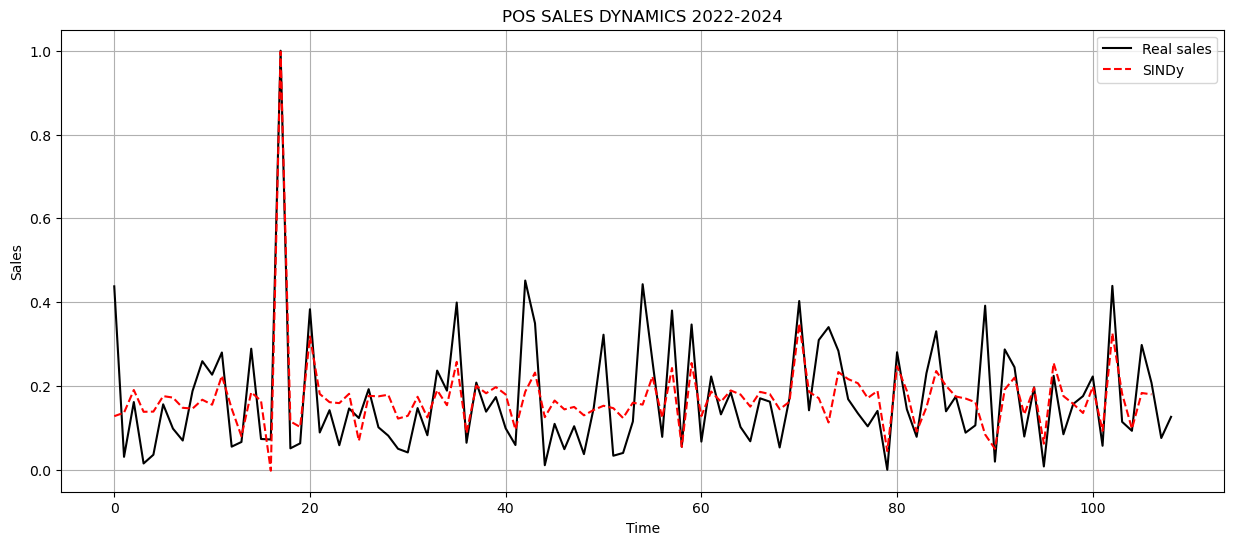

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_r2 = -np.inf
best_shift = 0
best_bias = 0
best_adjusted = None

# Probar shifts en X de -5 a 5
for s in range(-5, 6):
    if s > 0:
        y_r = y_real_plot[s:]
        y_s = y_sim_plot[:-s]
    elif s < 0:
        y_r = y_real_plot[:s]
        y_s = y_sim_plot[-s:]
    else:
        y_r = y_real_plot
        y_s = y_sim_plot

    # Calcular bias en Y
    bias = np.mean(y_s - y_r)
    y_s_adj = y_s - bias  # corregido en Y

    # Calcular R² del ajuste
    r2 = r2_score(y_r, y_s_adj)

    if r2 > best_r2:
        best_r2 = r2
        best_shift = s
        best_bias = bias
        best_adjusted = (y_r, y_s_adj)

# Mostrar resultados
print(f"Best shift in X: {best_shift}")
print(f"Bias applied in Y: {best_bias:.4f}")
print(f"R² of best fit: {best_r2:.4f}")

# Graficar
plt.figure(figsize=(15,6))
plt.plot(y_real_plot, color="black", label="Real sales")
##plt.plot(y_sim_plot, 'g--', label="Simulado (original)")
plt.plot(range(best_shift if best_shift>0 else 0, 
               len(best_adjusted[1]) + (best_shift if best_shift>0 else 0)),
         best_adjusted[1], 'r--', label="SINDy")
plt.title("POS SALES DYNAMICS 2022-2024")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
################test % FINAL SI ES VALIDACIÓN Y PRUEBA#######################################################

In [26]:
if V_TEST_VALIDATION:
    print("No test")
else:
    # Entradas para validación
    u_test6 = np.hstack((r_test[1:], x_test[:-1], n_test[:-1], k_test[:-1], l_test[:-1], u_test[:-1]))
    # Estado inicial: primera fila de y_val
    y0 = y_test[0]  # vector inicial (1 salida → valor escalar o array de shape (1,))
    
    # Tiempo de simulación
    t = np.arange(len(y_test[1:]))  # un punto por muestra
    t2=len(x_test)
    # Simulación
    y_sim_test = sindy_model.simulate(y0, t2, u=u_test6)

No test


In [27]:
if V_TEST_VALIDATION:
    print("No test")
else:
    ##escalado###
    scaler_y_val = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
    y_val_scaled = scaler_y_val.fit_transform(y_test.reshape(-1, 1))
    
    scaler_y_sim = MinMaxScaler(feature_range=(0, 1)) #StandardScaler()
    y_sim_scaled = scaler_y_sim.fit_transform(y_sim_test.reshape(-1, 1))
    ##escalado###
    min_len = min(len(y_val_scaled[1:]), len(y_sim_scaled))
    y_real_plot = y_val_scaled[1:min_len+1].ravel()
    y_sim_plot = y_sim_scaled[:min_len].ravel()

No test


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

if V_TEST_VALIDATION:
    print("No test")
else:
    best_r2 = -np.inf
    best_shift = 0
    best_bias = 0
    best_adjusted = None
    
    # Probar shifts en X de -5 a 5
    for s in range(-5, 6):
        if s > 0:
            y_r = y_real_plot[s:]
            y_s = y_sim_plot[:-s]
        elif s < 0:
            y_r = y_real_plot[:s]
            y_s = y_sim_plot[-s:]
        else:
            y_r = y_real_plot
            y_s = y_sim_plot
    
        # Calcular bias en Y
        bias = np.mean(y_s - y_r)
        y_s_adj = y_s - bias  # corregido en Y
    
        # Calcular R² del ajuste
        r2 = r2_score(y_r, y_s_adj)
    
        if r2 > best_r2:
            best_r2 = r2
            best_shift = s
            best_bias = bias
            best_adjusted = (y_r, y_s_adj)
    
    # Mostrar resultados
    print(f"Mejor shift en X: {best_shift}")
    print(f"Bias aplicado en Y: {best_bias:.4f}")
    print(f"R² del mejor ajuste: {best_r2:.4f}")
    
    # Graficar
    plt.figure(figsize=(10,6))
    plt.plot(y_real_plot, color="black", label="Real")
    ##plt.plot(y_sim_plot, 'g--', label="Simulado (original)")
    plt.plot(range(best_shift if best_shift>0 else 0, 
                   len(best_adjusted[1]) + (best_shift if best_shift>0 else 0)),
             best_adjusted[1], 'r--', label="Simulado (ajustado X+Y)")
    plt.title("Ajuste en X (shift) + Y (bias correction)")
    plt.xlabel("Tiempo")
    plt.ylabel("VentaNeta")
    plt.legend()
    plt.grid(True)
    plt.show()

No test
